In [1]:
import os
import glob
import folium
from folium.plugins import MarkerCluster

def get_csv_files():
    current_dir = os.getcwd()
    parent_dir = os.path.dirname(current_dir)
    raw_data_dir = os.path.join(parent_dir, "Raw Station Datasets")
    csv_files = glob.glob(os.path.join(raw_data_dir, '*.csv'))
    filtered_files = sorted([file for file in csv_files if os.path.basename(file)[:3].isdigit()],
                            key=lambda x: int(os.path.basename(x)[:3]))
    return filtered_files

def extract_metadata(file):
    try:
        with open(file, 'r') as f:
            meta_lines = [f.readline().strip() for _ in range(12)]
        
        metadata = {}
        for line in meta_lines[4:10]:
            if ':' in line:
                key, value = line.split(':', 1)
                metadata[key.strip('# ').upper()] = value.strip()
        
        return metadata
    except Exception as e:
        print(f"Error extracting metadata from {os.path.basename(file)}: {e}")
        return {}

def create_hawaii_map():
    hawaii_center = [20.2927, -156.3737]
    m = folium.Map(location=hawaii_center, zoom_start=7, tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
                   attr='Google Satellite')
    marker_cluster = MarkerCluster().add_to(m)
    return m, marker_cluster

def add_station_to_map(map_obj, cluster, station_name, lat, lon):
    folium.Marker(
        location=[float(lat), float(lon)],
        popup=station_name,
        tooltip=station_name
    ).add_to(cluster)

def main():
    csv_files = get_csv_files()
    hawaii_map, marker_cluster = create_hawaii_map()

    for file in csv_files:
        metadata = extract_metadata(file)
        station_name = metadata.get('STATION NAME', os.path.basename(file))
        latitude = metadata.get('LATITUDE')
        longitude = metadata.get('LONGITUDE')

        if latitude and longitude:
            try:
                add_station_to_map(hawaii_map, marker_cluster, station_name, latitude, longitude)
                print(f"Added {station_name} to map")
            except ValueError as e:
                print(f"Error: Invalid coordinates for {station_name}: Lat={latitude}, Lon={longitude}. Error: {e}")
        else:
            print(f"Skipping {station_name} due to missing coordinates")
            print(f"Metadata: {metadata}")

    hawaii_map.save("hawaii_stations_map.html")
    print("Map saved as hawaii_stations_map.html")

if __name__ == "__main__":
    main()

Added Kula Ag to map
Added Park HQ to map
Added Summit to map
Added Nahuku to map
Added IPIF to map
Added Spencer to map
Added Laupahoehoe to map
Added Palamamnui to map
Added Mamalahoa to map
Added PuuWaawaa to map
Added Lyon to map
Added Nuuanu Res 1 to map
Added Nene Nest to map
Added Waipa to map
Added Common Ground to map
Added Keokea to map
Added Piiholo to map
Added Kaiholena to map
Added Kahikinui to map
Added Waikamoi to map
Added Kulaimano to map
Added Kanakaleonui to map
Added Hamoa to map
Added Lower Limahuli to map
Added Kehena Ditch Cabin to map
Added Kaala to map
Added Lalamilo to map
Added Auwahi to map
Added Keahuolu to map
Added Keopukaloa to map
Added Honolimaloo to map
Added Upper Kahikinui to map
Added Keaau to map
Added Kaiaulu Puu Waawaa to map
Added Kona Hema to map
Added Lahaina WTP to map
Added Upper Waiolani to map
Added Waiolani to map
Added Lipoa to map
Added Piihonua to map
Added Napuumaia to map
Added Pulehu to map
Added Pohaku Palaha to map
Added Lawai N

Added 001HI to map
Added 002HI to map
Added 003HI to map
Added 004HI to map
Added 005HI to map
Added 006HI to map
Added 007HI to map
Added 008HI to map
Added 009HI to map
Added 010HI to map
Added 011HI to map
Added 012HI to map
Added 013HI to map
Added 014HI to map
Added 015HI to map
Added 016HI to map
Added 017HI to map
Added 018HI to map
Added 019HI to map
Added 020HI to map
Added 021HI to map
Added 022HI to map
Added 023HI to map
Added 024HI to map
Added 025HI to map
Added 026HI to map
Added 027HI to map
Added 028HI to map
Added 029HI to map
Added 030HI to map
Added 031HI to map
Added 032HI to map
Added 033HI to map
Added 034HI to map
Added 035HI to map
Added 036HI to map
Added 037HI to map
Added 038HI to map
Added 039HI to map
Added 040HI to map
Added 041HI to map
Added 042HI to map
Added 043HI to map
Added 044HI to map
Added 045HI to map
Added 046HI to map
Added 047HI to map
Added 048HI to map
Added 049HI to map
Added 050HI to map
Added 051HI to map
Added 052HI to map
Added 053HI 

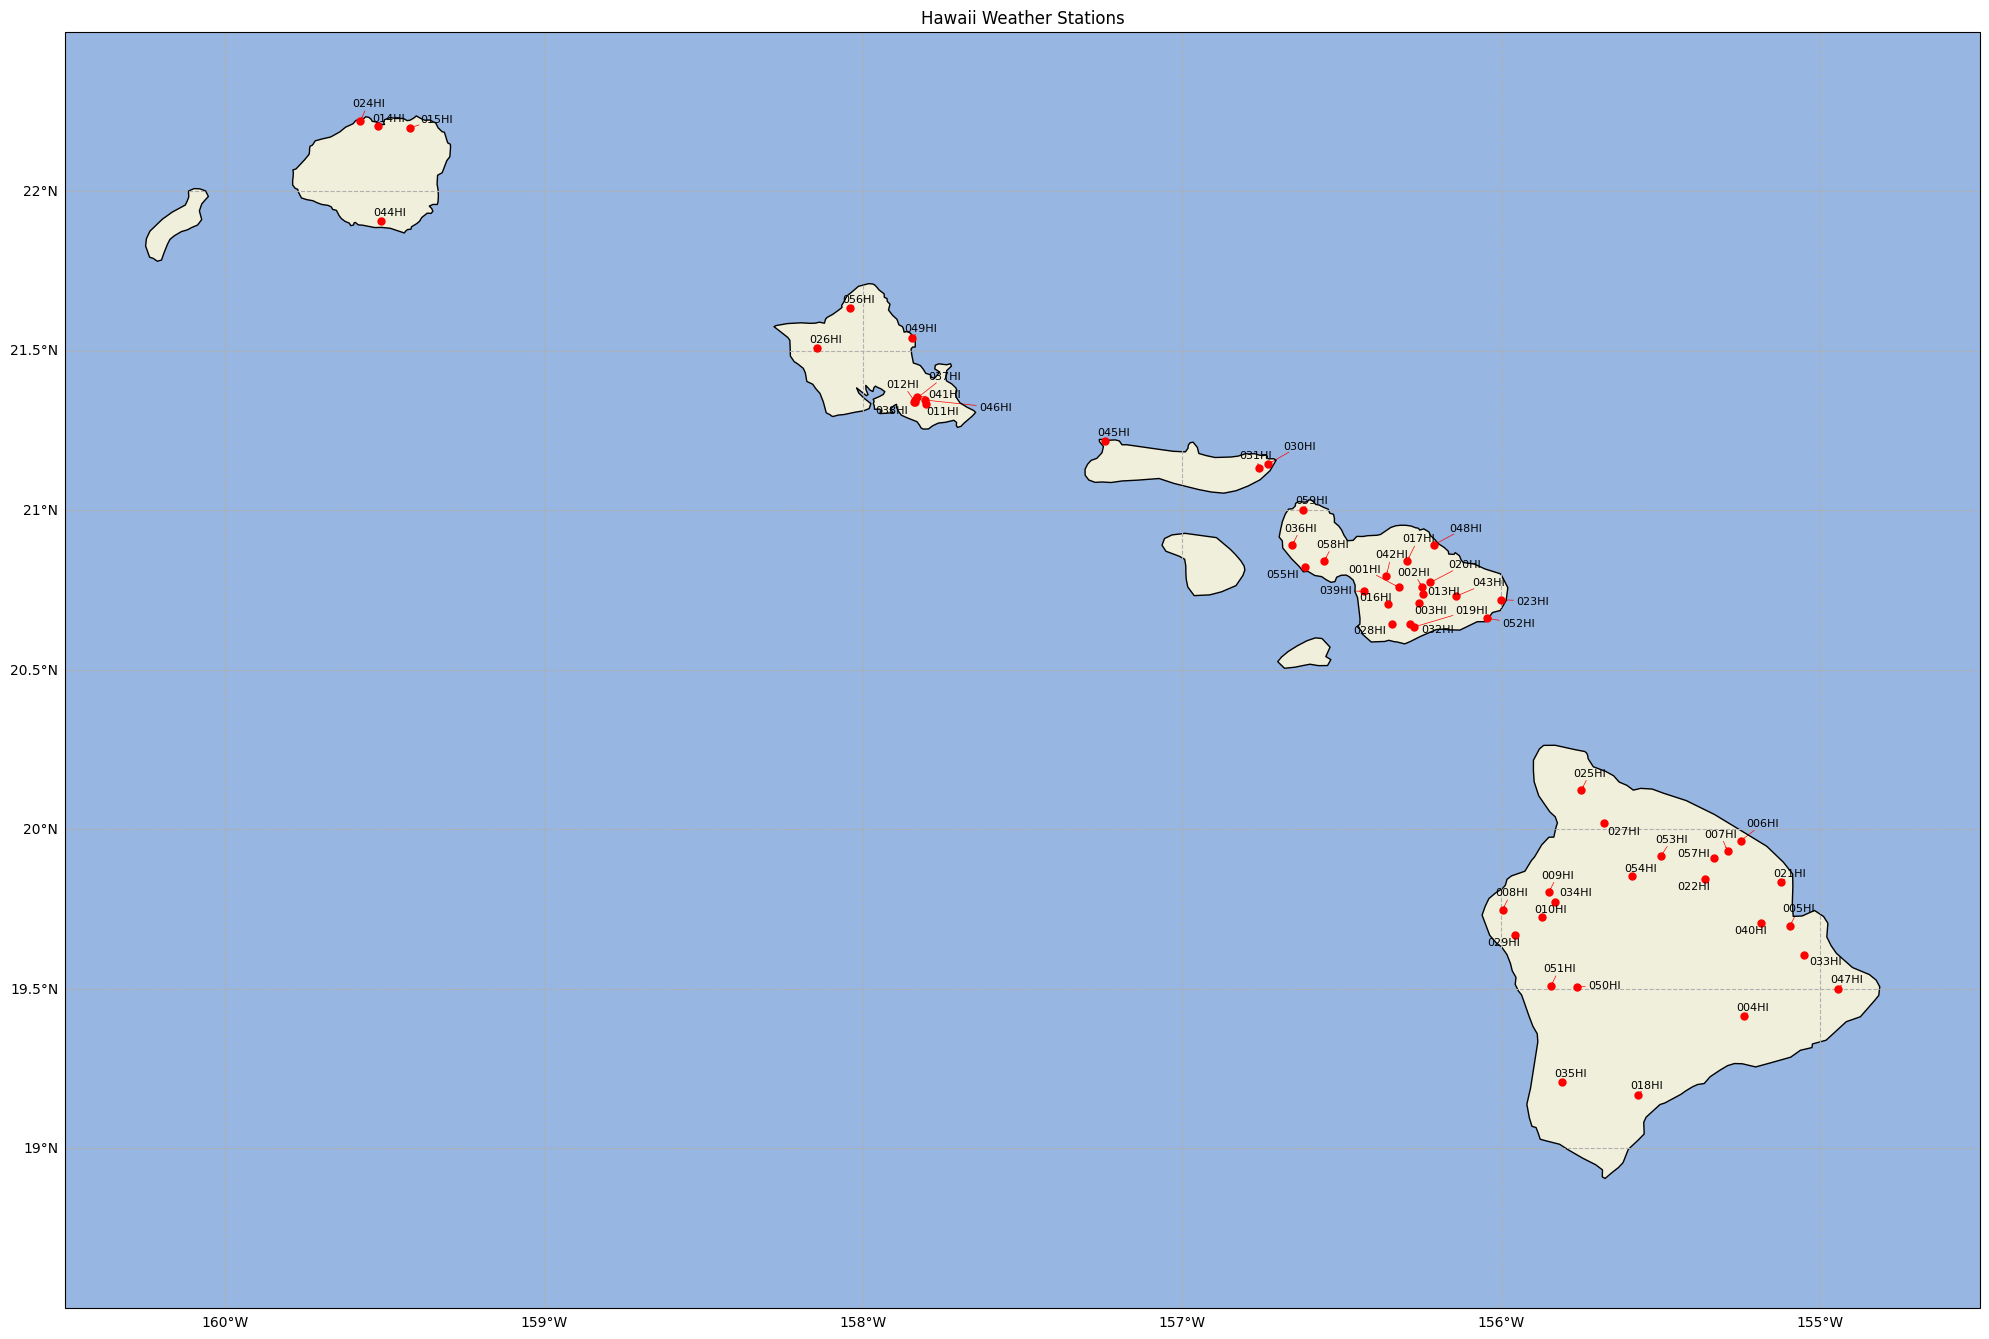

In [2]:
import os
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
#!pip install adjustText
from adjustText import adjust_text

def get_csv_files():
    current_dir = os.getcwd()
    parent_dir = os.path.dirname(current_dir)
    raw_data_dir = os.path.join(parent_dir, "Raw Station Datasets")
    csv_files = glob.glob(os.path.join(raw_data_dir, '*.csv'))
    filtered_files = sorted([file for file in csv_files if os.path.basename(file)[:3].isdigit()],
                            key=lambda x: int(os.path.basename(x)[:3]))
    return filtered_files

def extract_metadata(file):
    try:
        with open(file, 'r') as f:
            meta_lines = [f.readline().strip() for _ in range(12)]
        
        metadata = {}
        for line in meta_lines[4:10]:
            if ':' in line:
                key, value = line.split(':', 1)
                metadata[key.strip('# ').upper()] = value.strip()
        
        return metadata
    except Exception as e:
        print(f"Error extracting metadata from {os.path.basename(file)}: {e}")
        return {}

def create_hawaii_map(stations):
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Set map extent to cover all Hawaiian islands
    ax.set_extent([-160.5, -154.5, 18.5, 22.5], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Plot stations
    texts = []
    for station in stations:
        ax.plot(station['lon'], station['lat'], 'ro', markersize=5, transform=ccrs.PlateCarree())
        texts.append(ax.text(station['lon'], station['lat'], station['name'], fontsize=8, 
                             ha='center', va='bottom', transform=ccrs.PlateCarree()))

    # Adjust text positions to avoid overlapping
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.title('Hawaii Weather Stations')
    plt.tight_layout()
    plt.savefig('hawaii_stations_map.png', dpi=300, bbox_inches='tight')
    print("Map saved as hawaii_stations_map.png")

def main():
    csv_files = get_csv_files()
    stations = []

    for file in csv_files:
        metadata = extract_metadata(file)
        station_name = metadata.get('STATION', os.path.basename(file)[:5])
        latitude = metadata.get('LATITUDE')
        longitude = metadata.get('LONGITUDE')

        if latitude and longitude:
            try:
                stations.append({
                    'name': station_name,
                    'lat': float(latitude),
                    'lon': float(longitude)
                })
                print(f"Added {station_name} to map")
            except ValueError as e:
                print(f"Error: Invalid coordinates for {station_name}: Lat={latitude}, Lon={longitude}. Error: {e}")
        else:
            print(f"Skipping {station_name} due to missing coordinates")
            print(f"Metadata: {metadata}")

    create_hawaii_map(stations)

if __name__ == "__main__":
    main()